# CIFAR10 CNN

Train a simple deep CNN on the CIFAR10 small images dataset.

Some constants we'll use:

In [1]:
batch_size = 32
num_classes = 10
epochs = 200
data_augmentation = True
num_predictions = 20

In [2]:
from conx import *

conx, version 3.4.0
Using Theano backend.


In [3]:
net = Network("CIRAR10")
net.add(ImageLayer("input", (32, 32), 3)) # depends on K.image_data_format(), right?
net.add(Conv2DLayer("conv1", 32, (3, 3), padding='same', activation='relu'))
net.add(Conv2DLayer("conv2", 32, (3, 3), activation='relu'))
net.add(MaxPool2DLayer("pool1", pool_size=(2, 2), dropout=0.25))
net.add(Conv2DLayer("conv3", 64, (3, 3), padding='same', activation='relu'))
net.add(Conv2DLayer("conv4", 64, (3, 3), activation='relu'))
net.add(MaxPool2DLayer("pool2", pool_size=(2, 2), dropout=0.25))
net.add(FlattenLayer("flatten"))
net.add(Layer("hidden1", 512, activation='relu', vshape=(16, 32), dropout=0.5))
net.add(Layer("output", num_classes, activation='softmax'))
net.connect()

# initiate RMSprop optimizer
opt = RMSprop(lr=0.0001, decay=1e-6)

net.compile(loss='categorical_crossentropy',
            optimizer=opt)

# Let's train the model using RMSprop
net.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])
model = net.model

In [4]:
net.dataset.get("cifar10")

In [5]:
net.dataset.summary()

Input Summary:
   count  : 60000 (60000 for training, 0 for testing)
   shape  : [(32, 32, 3)]
   range  : (0.0, 1.0)
Target Summary:
   count  : 60000 (60000 for training, 0 for testing)
   shape  : [(10,)]
   range  : (0.0, 1.0)


In [6]:
net.dataset.split(50000)
net.dataset.summary()

Input Summary:
   count  : 60000 (10000 for training, 50000 for testing)
   shape  : [(32, 32, 3)]
   range  : (0.0, 1.0)
Target Summary:
   count  : 60000 (10000 for training, 50000 for testing)
   shape  : [(10,)]
   range  : (0.0, 1.0)


## Examine Input as Image

In [8]:
net.dataset.inputs.shape

[(32, 32, 3)]

In [9]:
net.dataset.targets.shape

[(10,)]

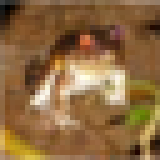

In [10]:
image = array2image(net.dataset.inputs[0], scale=5.0)
image

In [11]:
net.dashboard()

<IPython.core.display.Javascript object>

Dashboard(children=(VBox(children=(VBox(children=(HBox(children=(Select(description='Dataset:', index=1, options=('Test', 'Train'), rows=1, value='Train'), Select(description='Features:', options=('', 'input', 'conv1', 'conv2', 'pool1', 'conv3', 'conv4', 'pool2'), rows=1, value=''), Button(icon='refresh', layout=Layout(width='40px'), style=ButtonStyle())), layout=Layout(height='40px')), HBox(children=(IntSlider(value=0, continuous_update=False, description='Dataset index', layout=Layout(width='95%'), max=9999), Label(value='of 0', layout=Layout(width='100px'))), layout=Layout(height='40px')), HBox(children=(Button(icon='fast-backward', layout=Layout(width='100%'), style=ButtonStyle()), Button(icon='backward', layout=Layout(width='100%'), style=ButtonStyle()), IntText(value=0, layout=Layout(width='100%')), Button(icon='forward', layout=Layout(width='100%'), style=ButtonStyle()), Button(icon='fast-forward', layout=Layout(width='100%'), style=ButtonStyle()), Button(description='Play', icon='play', layout=Layout(width='100%'), style=ButtonStyle())), layout=Layout(height='50px', width='100%'))), layout=Layout(width='95%')), HTML(value='<p style="text-align:center"><svg id=\'CIRAR10\' xmlns=\'http://www.w3.org/2000/svg\' viewBox="0 0 350 1875" height="780" image-rendering="pixelated">\n    <defs>\n        <marker id="arrow" markerWidth="10" markerHeight="10" refX="9" refY="3" orient="auto" markerUnits="strokeWidth">\n          <path d="M0,0 L0,6 L9,3 z" fill="black" />\n        </marker>\n    </defs><text x="175.0" y="12.5" font-family="monospace" font-size="15" text-anchor="middle" alignment-baseline="central">CIRAR10</text><rect x="74.0" y="29" width="202" height="27" style="fill:none;stroke:black;stroke-width:2"/><image id="CIRAR10_output_1" class="CIRAR10_output" x="75.0" y="30" height="25" width="200" preserveAspectRatio="none" href="data:image/gif;base64,R0lGODdhCgABAIcAAMrK/9HR/wAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACwAAAAACgABAAAIDgADAAAQAACAAAEABAgIADs="><title>Layer: output (output)\n shape = (10,)\n Keras class = Dense\n activation = softmax</title></image><text x="280.0" y="44.5" font-family="monospace" font-size="12" text-anchor="start" alignment-baseline="central">output</text><line x1="175.0" y1="84" x2="175.0" y2="57" stroke="red" stroke-width="2" marker-end="url(#arrow)"><title>Weights from hidden1 to output\n output/kernel has shape (512, 10)\n output/bias has shape (10,)</title></line><rect x="74.0" y="84" width="202" height="102" style="fill:none;stroke:black;stroke-width:2"/><image id="CIRAR10_hidden1_2" class="CIRAR10_hidden1" x="75.0" y="85" height="100" width="200" preserveAspectRatio="none" href="data:image/gif;base64,R0lGODdhIAAQAIcAAPz7/efn/9fX/8fH/7W1/6Wl/wAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA

In [12]:
net.propagate(net.dataset.inputs[1])

[0.09824256598949432,
 0.11341553181409836,
 0.10656856745481491,
 0.09783723950386047,
 0.11487564444541931,
 0.098569855093956,
 0.09011363238096237,
 0.08840988576412201,
 0.09548024833202362,
 0.09648684412240982]

## Let Keras Take over from here

In [13]:
import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator

In [19]:
import numpy as np

In [24]:
(x_train, y_train), (x_test, y_test) = net.dataset._split_data()

In [25]:
model = net.model

In [26]:
if not data_augmentation:
    print('Not using data augmentation.')
    model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(x_test, y_test),
              shuffle=True)
else:
    print('Using real-time data augmentation.')
    # This will do preprocessing and realtime data augmentation:
    datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=0,  # randomly rotate images in the range (degrees, 0 to 180)
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False)  # randomly flip images

    # Compute quantities required for feature-wise normalization
    # (std, mean, and principal components if ZCA whitening is applied).
    datagen.fit(x_train)

    # Fit the model on the batches generated by datagen.flow().
    model.fit_generator(datagen.flow(x_train, y_train,
                                     batch_size=batch_size),
                        steps_per_epoch=x_train.shape[0] // batch_size,
                        epochs=epochs,
                        validation_data=(x_test, y_test))

Using real-time data augmentation.


ValueError: Input to `.fit()` should have rank 4. Got array with shape: (1, 10000, 32, 32, 3)

In [31]:
# Evaluate model with test data set and share sample prediction results
evaluation = model.evaluate_generator(datagen.flow(x_test, y_test,
                                      batch_size=batch_size),
                                      steps=x_test.shape[0] // batch_size)

print('Model Accuracy = %.2f' % (evaluation[1]))

predict_gen = model.predict_generator(datagen.flow(x_test, y_test,
                                      batch_size=batch_size),
                                      steps=x_test.shape[0] // batch_size)

for predict_index, predicted_y in enumerate(predict_gen):
    actual_label = labels['label_names'][np.argmax(y_test[predict_index])]
    predicted_label = labels['label_names'][np.argmax(predicted_y)]
    print('Actual Label = %s vs. Predicted Label = %s' % (actual_label,
                                                          predicted_label))
    if predict_index == num_predictions:
        break

ValueError: ('Input data in `NumpyArrayIterator` should have rank 4. You passed an array with shape', (1, 50000, 32, 32, 3))